In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from chainer import Chain, Variable, optimizers
import chainer.links as L
import chainer.functions as F
%matplotlib inline

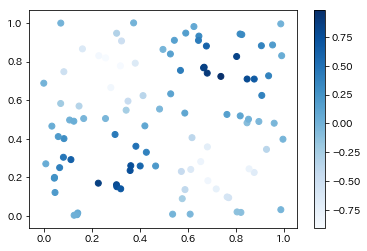

In [2]:
# 実測データの生成
x1 = np.random.rand(100)
x2 = np.random.rand(100)
y = np.sin(x1*2*np.pi)*np.sin(x2*2*np.pi)

plt.scatter(x1, x2, c=y, cmap='Blues')
plt.colorbar()
plt.show()

In [3]:
# ニューラルネットワークの設定
class MyChain(Chain):

    def __init__(self):
        super(MyChain, self).__init__(
            l1=L.Linear(2, 100),  # 入力変数の数
            l2=L.Linear(100, 30),
            l3=L.Linear(30, 1)  # 出力変数の数
        )

    def predict(self, x):
        h1 = F.relu(self.l1(x))  # 活性か関数
        h2 = F.relu(self.l2(h1))
        return self.l3(h2)

In [4]:
x_ = np.c_[x1, x2]
y_ = y.reshape(-1, 1)
x = Variable(np.array(x_, dtype=np.float32))
y = Variable(np.array(y_, dtype=np.float32))

In [5]:
model = MyChain()


def forward(x, y, model):
    t = model.predict(x)
    loss = F.mean_squared_error(t, y)  # MSE
    return loss


optimizer = optimizers.Adam()
optimizer.setup(model)

In [6]:
# ネットワークの学習
for i in range(1000):
    loss = forward(x, y, model)
    optimizer.update(forward, x, y, model)
    if (i+1) % 100 == 1:
        print(loss.data)

0.2467954456806183
0.10911396145820618
0.08310256898403168
0.06597128510475159
0.04546889290213585
0.02710605598986149
0.013861428946256638
0.0061209495179355145
0.003438753541558981
0.002244346309453249


In [7]:
# 格子点生成
a = np.arange(0, 1, 0.01)
X, Y = np.meshgrid(a, a)
X = X.reshape(-1)
Y = Y.reshape(-1)
x_search = np.c_[X, Y]

x_search_ = Variable(np.array(x_search, dtype=np.float32))
y_predict = model.predict(x_search_)

In [8]:
def display(top_n):
    z = y_predict.data.reshape(-1).argsort()[-1::-1]
    Input = x_search_.data[z[:top_n]]
    Output = y_predict.data[z[:top_n]]
    x_target_display = pd.DataFrame(Input)
    x_target_display['y_predict'] = Output
    return x_target_display

In [9]:
# 予測値の高い上位top_nを表示
top_n = 10
display(top_n)

,0,1,y_predict
0,0.24,0.21,0.957080
1,0.24,0.22,0.956269
2,0.25,0.21,0.955830
3,0.23,0.22,0.953094
4,0.23,0.23,0.950734
5,0.24,0.23,0.950616
6,0.25,0.22,0.950378
7,0.26,0.21,0.949939
8,0.26,0.20,0.948558
9,0.25,0.20,0.948183


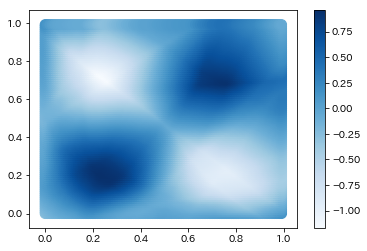

In [10]:
plt.scatter(x_search_.data[:, 0], x_search_.data[:, 1],
            s=100, c=y_predict.data.reshape(-1), cmap='Blues')
plt.colorbar()
plt.show()

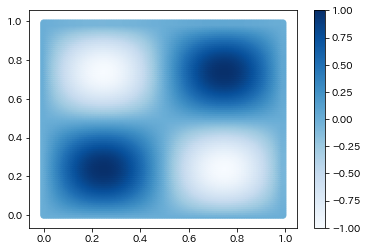

In [11]:
# 正解
y_real = np.sin(X*2*np.pi)*np.sin(Y*2*np.pi)
plt.scatter(X, Y, c=y_real, cmap='Blues')
plt.colorbar()
plt.show()